#Анализ факторов, определяющих кредитоспособность клиентов банка

Выполнено Петроченко П.А. 2025


**Целью данного анализа** является выявление и оценка ключевых факторов, оказывающих наибольшее влияние на кредитоспособность клиентов банка. На основе данных исследования мы стремимся определить, какие параметры заемщика являются наиболее значимыми предикторами высокого кредитного риска (дефолта).


###Импорт библиотек

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

###Чтение и предобработка датасета

Датасет загружается напрямую из репозитория UCI Machine Learning для обеспечения воспроизводимости анализа.

Ссылка на источник датасета: https://www.kaggle.com/datasets/varishabatool/data-set

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url)
df.head()

,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


Указываем названия колонок, так как в файле их нет

In [ ]:
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment_duration', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence', 'property', 'age',
    'other_installment_plans', 'housing', 'number_credits',
    'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'
]

Снова читаем данные и выводим информацию о них

In [ ]:
df = pd.read_csv(url, delimiter=' ', names=column_names, header=None)


print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о датасете:")
print(df.info())

Первые 5 строк данных:
  status  duration credit_history purpose  amount savings employment_duration  \
0    A11         6            A34     A43    1169     A65                 A75   
1    A12        48            A32     A43    5951     A61                 A73   
2    A14        12            A34     A46    2096     A61                 A74   
3    A11        42            A32     A42    7882     A61                 A74   
4    A11        24            A33     A40    4870     A61                 A73   

   installment_rate personal_status_sex other_debtors  ...  property age  \
0                 4                 A93          A101  ...      A121  67   
1                 2                 A92          A101  ...      A121  22   
2                 2                 A93          A101  ...      A121  49   
3                 2                 A93          A103  ...      A122  45   
4                 3                 A93          A101  ...      A124  53   

   other_installment_plans housin

Описание признаков через таблицу

In [ ]:
feature_descriptions = {
    'status': 'Текущий статус текущего счета',
    'duration': 'Продолжительность кредита в месяцах',
    'credit_history': 'Кредитная история',
    'purpose': 'Цель кредита',
    'amount': 'Сумма кредита',
    'savings': 'Статус сберегательного счета/облигаций',
    'employment_duration': 'Трудоустройство (текущее) в годах',
    'installment_rate': 'Процент дохода, идущий на погашение кредита',
    'personal_status_sex': 'Личный статус и пол',
    'other_debtors': 'Наличие других поручителей/созаемщиков',
    'present_residence': 'Продолжительность проживания по текущему адресу (лет)',
    'property': 'Наличие имущества',
    'age': 'Возраст в годах',
    'other_installment_plans': 'Наличие других рассрочек',
    'housing': 'Тип жилья',
    'number_credits': 'Количество активных кредитов',
    'job': 'Тип работы',
    'people_liable': 'Количество иждивенцев',
    'telephone': 'Наличие телефона',
    'foreign_worker': 'Иностранный работник',
    'credit_risk': 'Кредитный риск (1 - хороший, 2 - плохой)'
}

feature_df = pd.DataFrame(list(feature_descriptions.items()), columns=['Признак', 'Описание'])
print("Описание признаков датасета:")
feature_df

Описание признаков датасета:


,Признак,Описание
0,status,Текущий статус текущего счета
1,duration,Продолжительность кредита в месяцах
2,credit_history,Кредитная история
3,purpose,Цель кредита
4,amount,Сумма кредита
5,savings,Статус сберегательного счета/облигаций
6,employment_duration,Трудоустройство (текущее) в годах
7,installment_rate,"Процент дохода, идущий на погашение кредита"
8,personal_status_sex,Личный статус и пол
9,other_debtors,Наличие других поручителей/созаемщиков




---



Преобразуем целевую переменную: 1 = "хороший" (0) и 2 = "плохой" (1)

In [ ]:
df['credit_risk'] = df['credit_risk'].map({1: 0, 2: 1})  # 0 - хороший, 1 - плохой (дефолт)

# Переименуем для ясности
df.rename(columns={'credit_risk': 'default'}, inplace=True)

print("Распределение целевой переменной (default):")
print(df['default'].value_counts())
print(f"\nДоля дефолтов: {df['default'].mean():.2%}")

Распределение целевой переменной (default):
default
0    700
1    300
Name: count, dtype: int64

Доля дефолтов: 30.00%


##Предварительный анализ данных

In [ ]:

# 1. Базовая информация о датасете
print("1. ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ:")
print(f"• Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"• Типы данных:")
print(df.dtypes.value_counts())
print(f"• Память: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. Анализ пропущенных значений
print("\n2. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
missing_total = df.isnull().sum().sum()
if missing_total == 0:
    print("Пропущенных значений не обнаружено")
else:
    missing_data = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    missing_info = pd.DataFrame({
        'Количество пропусков': missing_data,
        'Процент пропусков': missing_percent
    })
    missing_info = missing_info[missing_info['Количество пропусков'] > 0]
    print(missing_info)

# 3. Анализ дубликатов
print("\n3. АНАЛИЗ ДУБЛИКАТОВ:")
duplicates = df.duplicated().sum()
print(f"• Полных дубликатов строк: {duplicates}")
if duplicates > 0:
    print("Внимание: есть дубликаты")
else:
    print("Дубликатов не обнаружено")

# 4. Статистика по числовым признакам
print("\n4. СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())

# 5. Статистика по категориальным признакам
print("\n5. СТАТИСТИКА ПО КАТЕГОРИАЛЬНЫМ ПРИЗНАКАМ:")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"• Количество категориальных признаков: {len(categorical_cols)}")

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"• {col}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только для признаков с малым количеством категорий
        print(f"  Значения: {df[col].unique()}")

# 6. Проверка на аномалии в числовых признаках
print("\n6. ПРОВЕРКА НА ПОТЕНЦИАЛЬНЫЕ АНОМАЛИИ:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"• {col}: {len(outliers)} потенциальных выбросов ({len(outliers)/len(df)*100:.1f}%)")

1. ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ:
• Размер датасета: 1000 строк, 21 столбцов
• Типы данных:
object    13
int64      8
Name: count, dtype: int64
• Память: 0.71 MB

2. АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:
Пропущенных значений не обнаружено

3. АНАЛИЗ ДУБЛИКАТОВ:
• Полных дубликатов строк: 0
Дубликатов не обнаружено

4. СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ:
          duration        amount  installment_rate  present_residence  \
count  1000.000000   1000.000000       1000.000000        1000.000000   
mean     20.903000   3271.258000          2.973000           2.845000   
std      12.058814   2822.736876          1.118715           1.103718   
min       4.000000    250.000000          1.000000           1.000000   
25%      12.000000   1365.500000          2.000000           2.000000   
50%      18.000000   2319.500000          3.000000           3.000000   
75%      24.000000   3972.250000          4.000000           4.000000   
max      72.000000  18424.000000          4.000000           4.000000   


Визуализация предварительного анализа

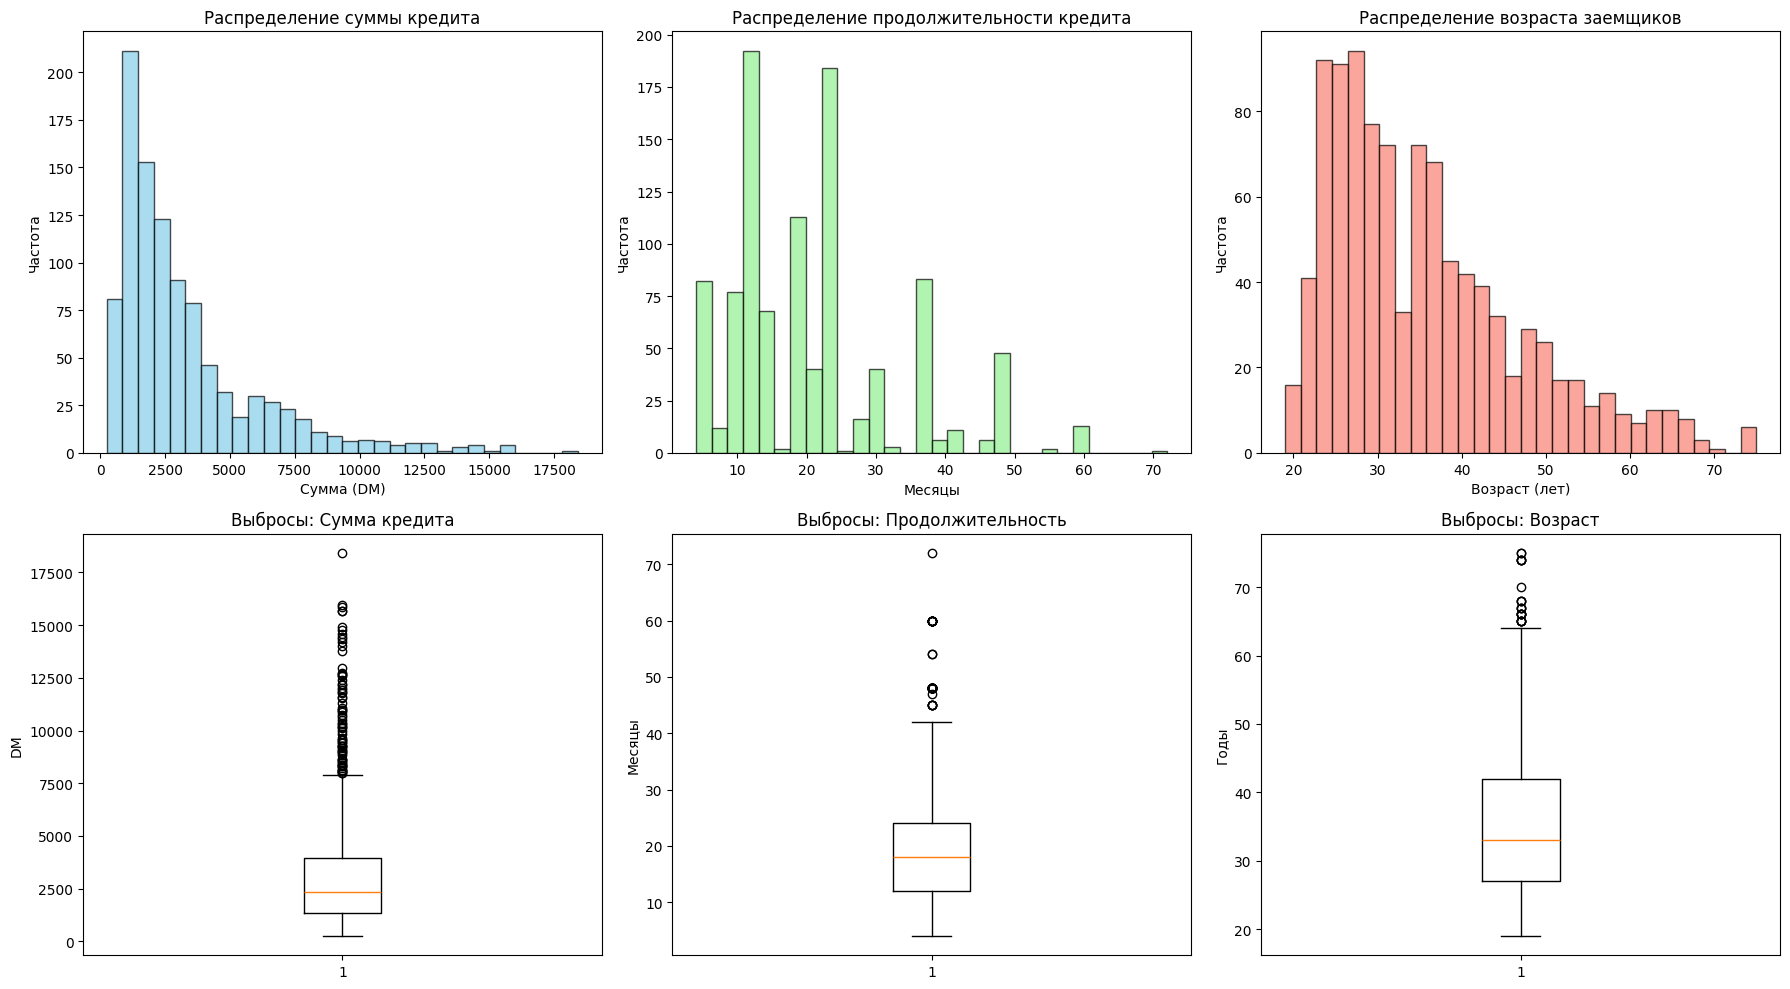


АНАЛИЗ ВЫБРОСОВ В КОНТЕКСТЕ ДЕФОЛТА:
    Признак  Выбросы всего  Выбросы-дефолты  Выбросы-хорошие  \
0    amount             72               39               33   
1  duration             70               40               30   
2       age             23                6               17   

  Доля дефолтов среди выбросов  
0                        54.2%  
1                        57.1%  
2                        26.1%  


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Распределение суммы кредита
axes[0,0].hist(df['amount'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение суммы кредита')
axes[0,0].set_xlabel('Сумма (DM)')
axes[0,0].set_ylabel('Частота')

# 2. Распределение продолжительности кредита
axes[0,1].hist(df['duration'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Распределение продолжительности кредита')
axes[0,1].set_xlabel('Месяцы')
axes[0,1].set_ylabel('Частота')

# 3. Распределение возраста
axes[0,2].hist(df['age'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_title('Распределение возраста заемщиков')
axes[0,2].set_xlabel('Возраст (лет)')
axes[0,2].set_ylabel('Частота')

# 4. Boxplot для выявления выбросов - сумма кредита
axes[1,0].boxplot(df['amount'])
axes[1,0].set_title('Выбросы: Сумма кредита')
axes[1,0].set_ylabel('DM')

# 5. Boxplot для выявления выбросов - продолжительность
axes[1,1].boxplot(df['duration'])
axes[1,1].set_title('Выбросы: Продолжительность')
axes[1,1].set_ylabel('Месяцы')

# 6. Boxplot для выявления выбросов - возраст
axes[1,2].boxplot(df['age'])
axes[1,2].set_title('Выбросы: Возраст')
axes[1,2].set_ylabel('Годы')

plt.tight_layout()
plt.show()

# Анализ выбросов в контексте дефолта
print("\nАНАЛИЗ ВЫБРОСОВ В КОНТЕКСТЕ ДЕФОЛТА:")
print("=" * 40)

outlier_analysis = []
for col in ['amount', 'duration', 'age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Выбросы среди дефолтов
    outliers_default = df[(df[col] > upper_bound) & (df['default'] == 1)]
    # Выбросы среди хороших заемщиков
    outliers_good = df[(df[col] > upper_bound) & (df['default'] == 0)]

    outlier_analysis.append({
        'Признак': col,
        'Выбросы всего': len(df[df[col] > upper_bound]),
        'Выбросы-дефолты': len(outliers_default),
        'Выбросы-хорошие': len(outliers_good),
        'Доля дефолтов среди выбросов': f"{len(outliers_default)/len(df[df[col] > upper_bound])*100:.1f}%"
    })

outlier_df = pd.DataFrame(outlier_analysis)
print(outlier_df)

##Выводы

**Выводы по графикам**
**1. Гистограмма: Распределение суммы кредита**

**Вывод:**
Распределение суммы кредита сильно скошено вправо. Большинство кредитов выданы на небольшие суммы, пик распределения находится в диапазоне от 0 до 2500 DM, где частота превышает 200 случаев. С увеличением суммы кредита количество заемщиков резко снижается. В выборке преобладают заемщики, берущие небольшие кредиты, а крупные кредиты (свыше 10 000 DM) редкость.

---

**2. Гистограмма: Распределение продолжительности кредита**

**Вывод:**
Распределение продолжительности кредита не является равномерным. Наиболее популярны сроки в 12, 18, 24 и 36 месяцев. Это говорит о том, что банк чаще всего предлагает стандартные сроки кредитования, а не произвольные. Также видно, что очень долгосрочные кредиты практически отсутствуют.

---

**3. Гистограмма: Распределение возраста заемщиков**

**Вывод:**
Возраст заемщиков распределен примерно нормально, но с легкой правой асимметрией. Пик приходится на возраст 25–35 лет — это самая многочисленная группа заемщиков. Количество заемщиков уменьшается по мере увеличения возраста, хотя есть небольшая вторичная волна в районе 40–50 лет. Заемщики старше 60 лет встречаются крайне редко. В целом, основной контингент это молодые и среднего возраста люди.

---

**4. Ящик с усами: Выбросы по сумме кредита**

**Вывод:**
На этом графике хорошо видна сильная положительная асимметрия и наличие множества выбросов в верхней части. Медиана (оранжевая линия) находится примерно на уровне 2500–3000 DM, а большинство значений (сам ящик) — в пределах 1000–5000 DM. Однако есть множество выбросов, доходящих до 17 500 DM. Это подтверждает, что хотя большинство кредитов маленькие, есть и единичные случаи выдачи очень крупных кредитов, которые могут влиять на статистические показатели.

---

**5. Ящик с усами: Выбросы по продолжительности кредита**

**Вывод:**
Медиана продолжительности кредита составляет около 18 месяцев, а интерквартильный размах (ящик) охватывает диапазон примерно от 12 до 24 месяцев. Есть несколько выбросов вверху до 70 месяцев. Это соответствует гистограмме: большинство кредитов выдаются на стандартные сроки, но иногда встречаются исключительно долгосрочные кредиты, которые можно считать аномалиями или специальными случаями.

---

**6. Ящик с усами: Выбросы по возрасту**

**Вывод:**
Медианный возраст заемщика составляет около 35 лет. Основная масса заемщиков (ящик) находится в диапазоне от 25 до 45 лет. Есть несколько выбросов в верхней части, это заемщики старше 65 лет, вплоть до 70+. Это согласуется с гистограммой: основную группу создаёт молодежь и зрелые люди, а пожилые заемщики редкость в этом случае, но они существуют и могут быть важны для анализа кредитного риска.

---

**Общий вывод по всем графикам:**

Данные демонстрируют типичную картину потребительского кредитования:
- **Большинство кредитов** — небольшие по сумме и стандартные по сроку.
- **Основной контингент заемщиков** — молодые и зрелые люди от 25 до 45 лет66.
- **Есть выбросы**, особенно по сумме кредита, что может указывать на наличие особо крупных займов или ошибок в данных.
- Распределения всех трех числовых переменных **не являются нормальными**, что важно учитывать при построении моделей машинного обучения6.


**Выводы по предварительному анализу**


1. Качество данных:
   • Пропусков нет
   • Дубликатов не6т
   • Память оптимизирована

2. Целевая переменная:
   • Сбалансированное распределение (70%/30%)
   • Реалистичная доля дефолтов 30%

3. Числовые признаки: трбуют внимания
   • Выбросы в 'duration', 'amount', 'people_liable'
   • 'people_liable': 15.5% выбросов - требует анализа

4. Категориальные признаки:
   • Нормальное количество категорий (2-10)
   • Нет признаков с аномальным количеством уникальных значений

Решения:

1. Выбросы не стоит удалять, стоит проанализировать их в контексте дефолта
2. Категориальные признаки: One-Hot Encoding для моделей ML
3. Дополнительные признаки: Создать производные признаки если они улучшат понимание модели
4. Нормализацию лучше применить для числовых признаков перед моделированием

## Расшифровка категориальных признаков


STATUS:
  A11: < 0 DM (n=274)
  A12: 0 <= ... < 200 DM (n=269)
  A13: >= 200 DM / salary assignments for at least 1 year (n=63)
  A14: no checking account (n=394)

CREDIT_HISTORY:
  A30: no credits taken/all credits paid back duly (n=40)
  A31: all credits at this bank paid back duly (n=49)
  A32: existing credits paid back duly till now (n=530)
  A33: delay in paying off in the past (n=88)
  A34: critical account/other credits existing (n=293)

PURPOSE:
  A40: car (new) (n=234)
  A41: car (used) (n=103)
  A42: furniture/equipment (n=181)
  A43: radio/television (n=280)
  A44: domestic appliances (n=12)
  A45: repairs (n=22)
  A46: education (n=50)
  A47: vacation (n=0)
  A48: retraining (n=9)
  A49: business (n=97)
  A410: others (n=12)

SAVINGS:
  A61: < 100 DM (n=603)
  A62: 100 <= ... < 500 DM (n=103)
  A63: 500 <= ... < 1000 DM (n=63)
  A64: >= 1000 DM (n=48)
  A65: unknown/no savings account (n=183)

EMPLOYMENT_DURATION:
  A71: unemployed (n=62)
  A72: < 1 year (n=172)
  A73: 1 <= ... < 4 years (n=339)
  A74: 4 <= ... < 7 years (n=174)
  A75: >= 7 years (n=253)

PERSONAL_STATUS_SEX:
  A91: male: divorced/separated (n=50)
  A92: female: divorced/separated/married (n=310)
  A93: male: single (n=548)
  A94: male: married/widowed (n=92)
  A95: female: single (n=0)

OTHER_DEBTORS:
  A101: none (n=907)
  A102: co-applicant (n=41)
  A103: guarantor (n=52)

PROPERTY:
  A121: real estate (n=282)
  A122: if not A121: building society savings agreement/life insurance (n=232)
  A123: if not A121/A122: car or other (n=332)
  A124: unknown/no property (n=154)

OTHER_INSTALLMENT_PLANS:
  A141: bank (n=139)
  A142: stores (n=47)
  A143: none (n=814)

HOUSING:
  A151: rent (n=179)
  A152: own (n=713)
  A153: for free (n=108)

JOB:
  A171: unemployed/unskilled - non-resident (n=22)
  A172: unskilled - resident (n=200)
  A173: skilled employee/official (n=630)
  A174: management/self-employed/highly qualified employee/officer (n=148)

TELEPHONE:
  A191: none (n=596)
  A192: yes, registered under the customers name (n=404)

FOREIGN_WORKER:
  A201: yes (n=963)
  A202: no (n=37)

##Разведочный анализ EDA

**Создаем функцию для отображения графиков**

АНАЛИЗ КЛЮЧЕВЫХ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ


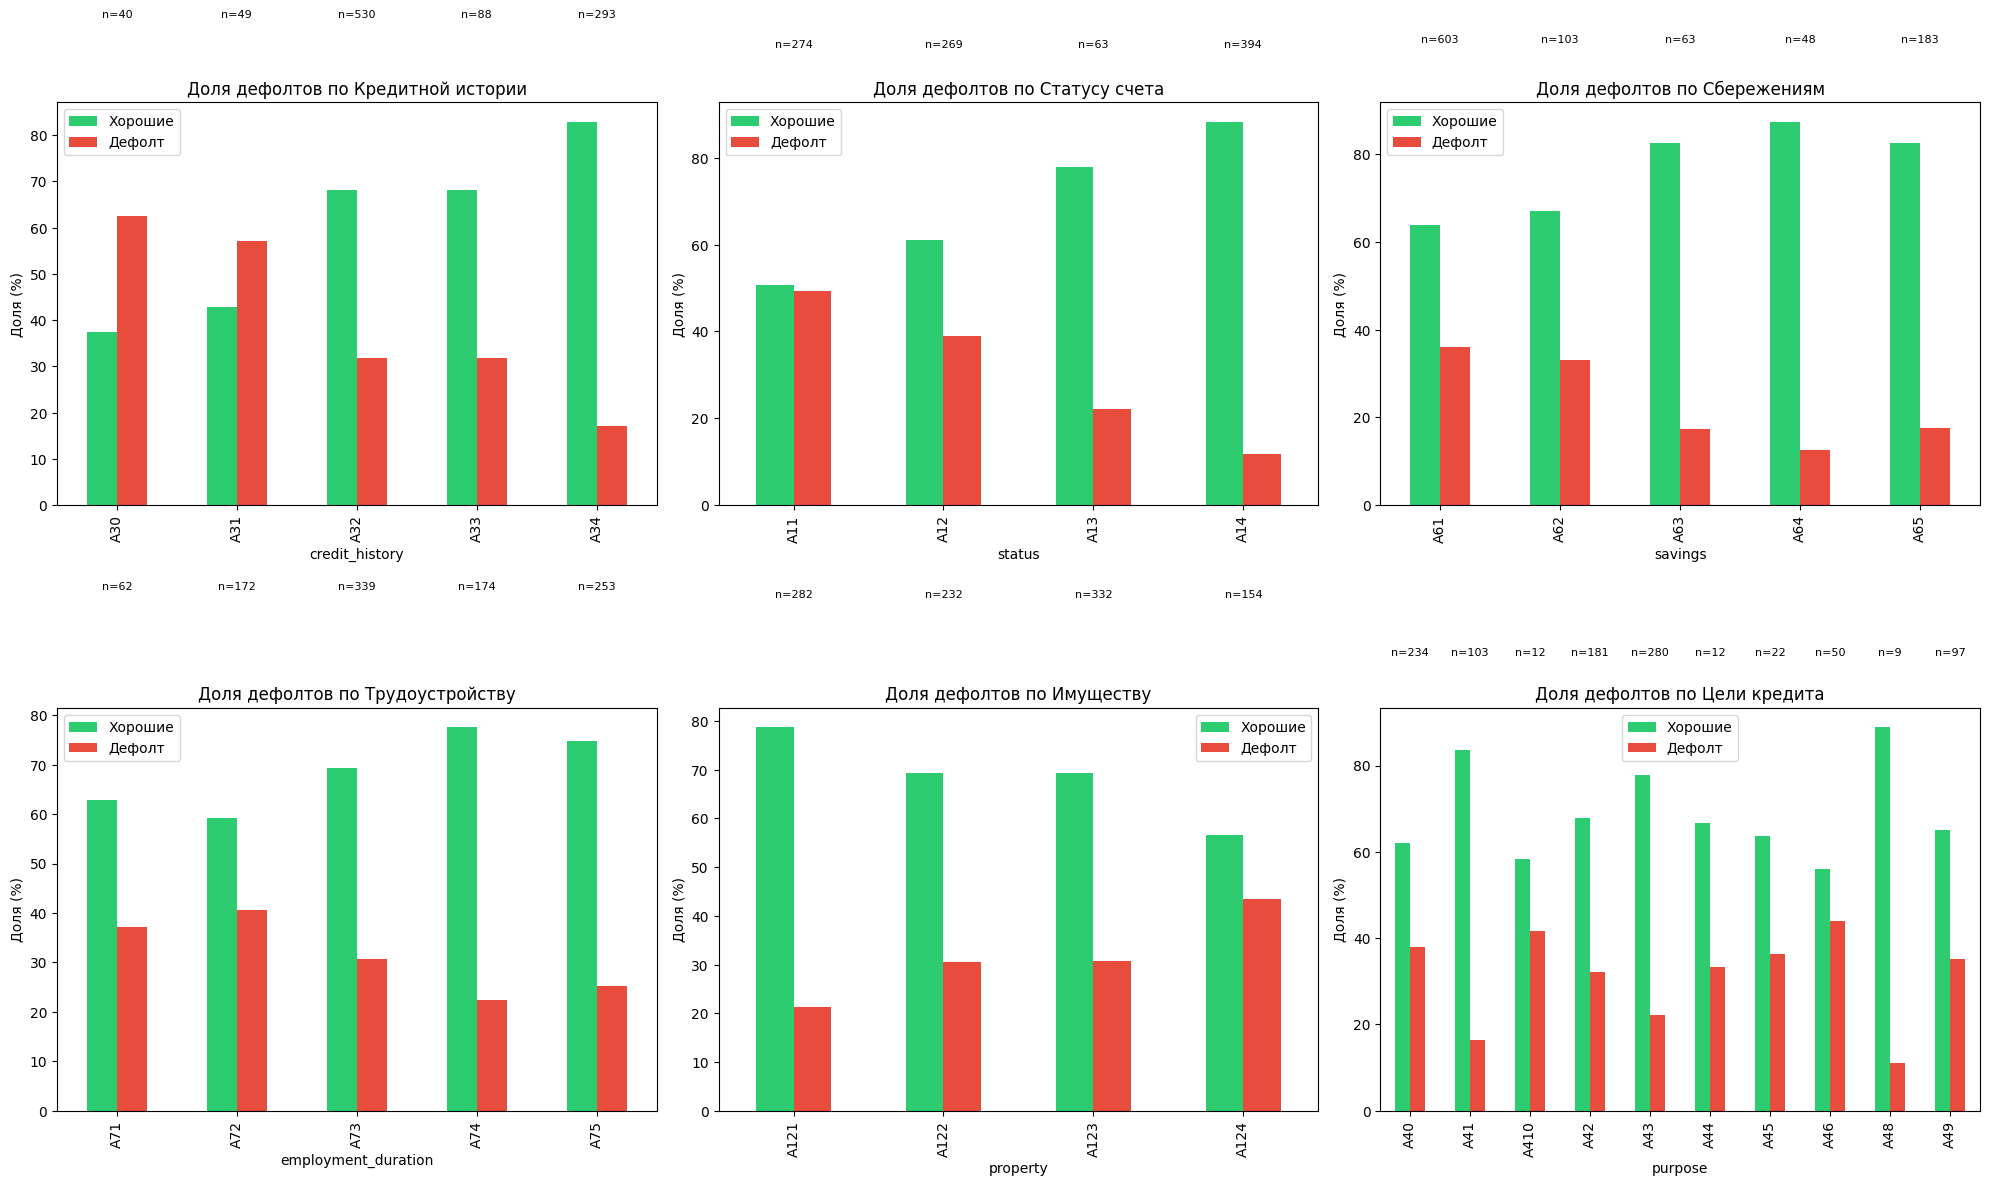


АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ В РАЗРЕЗЕ ДЕФОЛТА


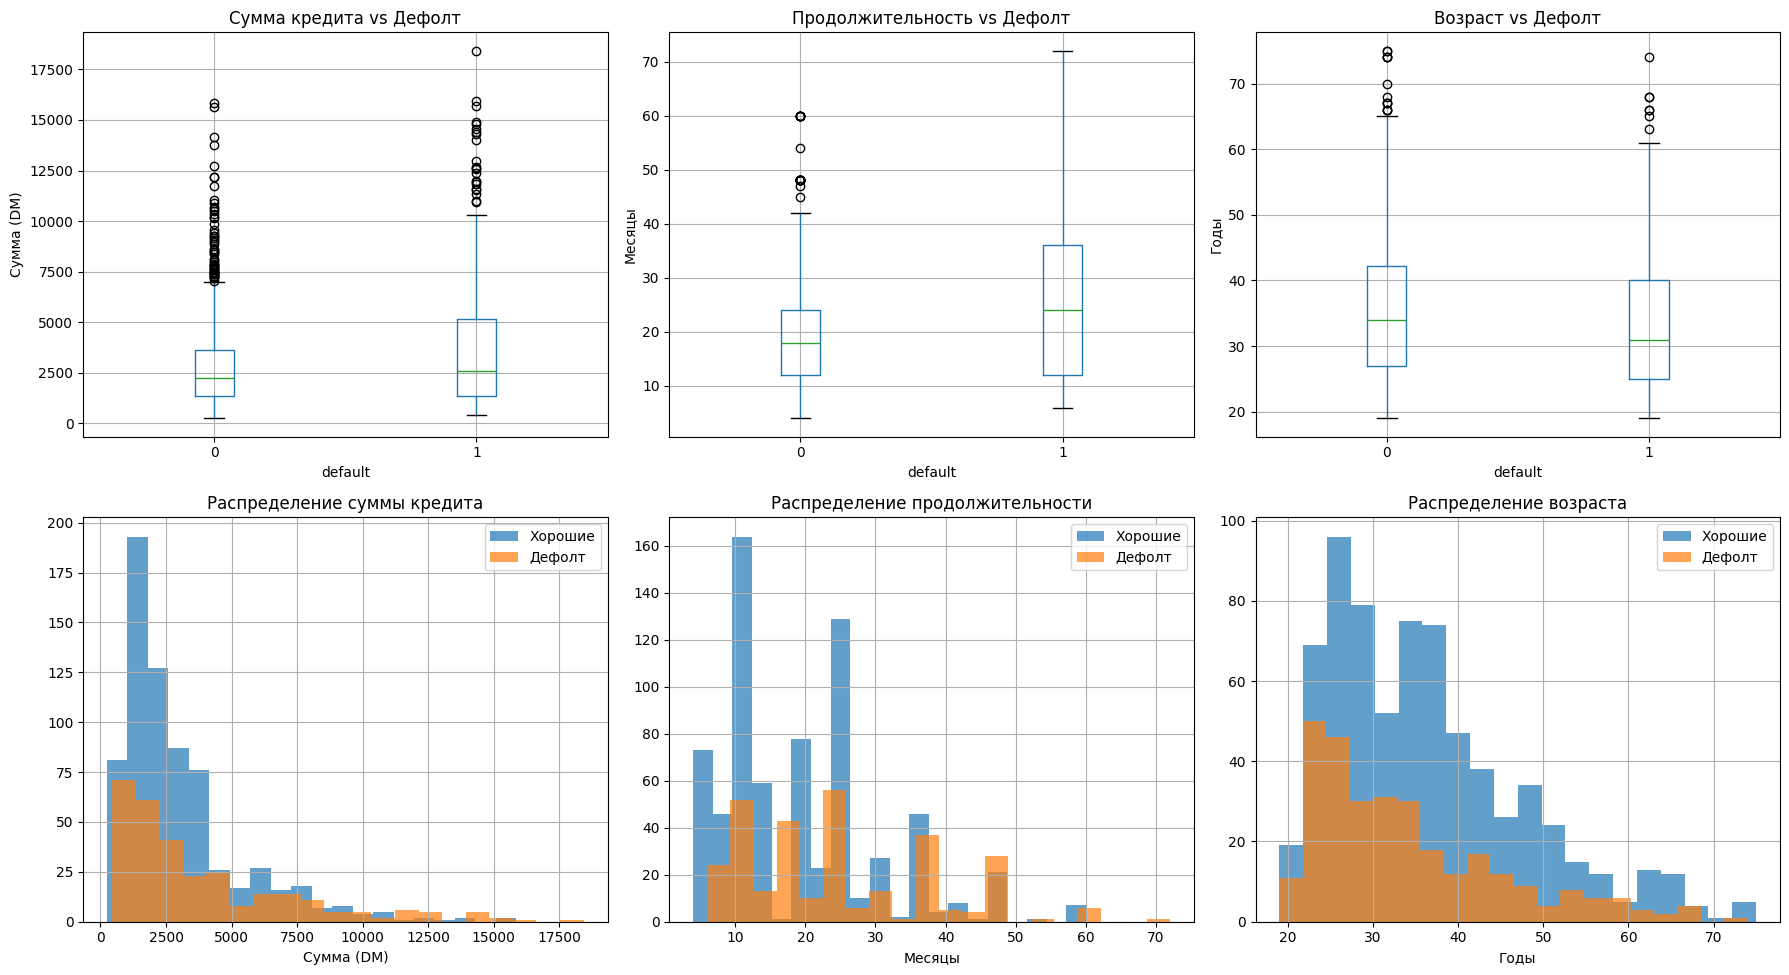

In [ ]:
# Создаем функцию для отображения графиков
def plot_categorical_with_target(feature, title, ax):
    """Визуализация категориального признака в разрезе дефолта"""
    cross_tab = pd.crosstab(df[feature], df['default'], normalize='index') * 100
    cross_tab.columns = ['Хорошие', 'Дефолт']
    cross_tab.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
    ax.set_title(f'Доля дефолтов по {title}')
    ax.set_ylabel('Доля (%)')
    ax.legend()
    # Добавляем аннотации с количеством наблюдений
    for i, (idx, row) in enumerate(cross_tab.iterrows()):
        total_count = len(df[df[feature] == idx])
        ax.text(i, 105, f'n={total_count}', ha='center', va='bottom', fontsize=8)

# Анализ ключевых категориальных признаков
print("АНАЛИЗ КЛЮЧЕВЫХ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Кредитная история
plot_categorical_with_target('credit_history', 'Кредитной истории', axes[0,0])

# 2. Статус счета
plot_categorical_with_target('status', 'Статусу счета', axes[0,1])

# 3. Сбережения
plot_categorical_with_target('savings', 'Сбережениям', axes[0,2])

# 4. Трудоустройство
plot_categorical_with_target('employment_duration', 'Трудоустройству', axes[1,0])

# 5. Имущество
plot_categorical_with_target('property', 'Имуществу', axes[1,1])

# 6. Цель кредита
plot_categorical_with_target('purpose', 'Цели кредита', axes[1,2])

plt.tight_layout()
plt.show()

# Анализ числовых признаков в разрезе дефолта
print("\nАНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ В РАЗРЕЗЕ ДЕФОЛТА")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Сумма кредита
df.boxplot(column='amount', by='default', ax=axes[0,0])
axes[0,0].set_title('Сумма кредита vs Дефолт')
axes[0,0].set_ylabel('Сумма (DM)')

# 2. Продолжительность кредита
df.boxplot(column='duration', by='default', ax=axes[0,1])
axes[0,1].set_title('Продолжительность vs Дефолт')
axes[0,1].set_ylabel('Месяцы')

# 3. Возраст
df.boxplot(column='age', by='default', ax=axes[0,2])
axes[0,2].set_title('Возраст vs Дефолт')
axes[0,2].set_ylabel('Годы')

# 4. Распределение суммы кредита
df[df['default'] == 0]['amount'].hist(alpha=0.7, label='Хорошие', bins=20, ax=axes[1,0])
df[df['default'] == 1]['amount'].hist(alpha=0.7, label='Дефолт', bins=20, ax=axes[1,0])
axes[1,0].set_title('Распределение суммы кредита')
axes[1,0].set_xlabel('Сумма (DM)')
axes[1,0].legend()

# 5. Распределение продолжительности
df[df['default'] == 0]['duration'].hist(alpha=0.7, label='Хорошие', bins=20, ax=axes[1,1])
df[df['default'] == 1]['duration'].hist(alpha=0.7, label='Дефолт', bins=20, ax=axes[1,1])
axes[1,1].set_title('Распределение продолжительности')
axes[1,1].set_xlabel('Месяцы')
axes[1,1].legend()

# 6. Распределение возраста
df[df['default'] == 0]['age'].hist(alpha=0.7, label='Хорошие', bins=20, ax=axes[1,2])
df[df['default'] == 1]['age'].hist(alpha=0.7, label='Дефолт', bins=20, ax=axes[1,2])
axes[1,2].set_title('Распределение возраста')
axes[1,2].set_xlabel('Годы')
axes[1,2].legend()

plt.suptitle('')
plt.tight_layout()
plt.show()

## Выводы из графиков

### Категориальные признаки. Доля дефолтов по группам

#### **1. Credit History (`credit_history`)**

- **A30**: "Никогда не брал кредитов / все кредиты погашены" — **40 объектов**, но **самый высокий % дефолтов (~65%)**.  
   Можно было ожидать, что «чистая история» = низкий риск. Но, видимо, у таких людей **нет кредитной дисциплины в принципе** и банк не может оценить их поведение. Это **группа неизвестного риска**, она оказывается **очень рискованной**.

- **A33**: "Были задержки в прошлом" — **88 объектов**, **~50% дефолтов** — логично: плохая история = высокий риск.

- **A34**: "Критический счёт / есть другие кредиты" — **293 объекта**, **~35% дефолтов** — не самый высокий, но всё же риск.

- **A31/A32**: "Все кредиты погашены" — **низкий уровень дефолтов (~10–15%)**.  **Это надёжные заемщики с подтверждённой историей**.

**Вывод**:  
> **Отсутствие кредитной истории (A30) — более рискованно, чем её наличие даже с задержками.** Лучшая группа — те, кто уже доказал свою надёжность (A31, A32).

---

#### **2. Status (`checking account`)**

- **A11**: `< 0 DM` (дебет, задолженность по счёту) — **274 человека**, **~50% дефолтов**.  Люди с **отрицательным балансом** это высокий риск.

- **A12**: `0–200 DM` — **269**, **~30% дефолтов**, имеет умеренный риск.

- **A13**: `≥200 DM или зарплатный счёт ≥1 год` — **63 человека**, **~10% дефолтов**.  **Наиболее надёжная группа**, как и ожидалось.

- **A14**: **Нет расчётного счёта** — **394**, **~12% дефолтов** — **очень низкий риск.**  
  Это **важно**: отсутствие счёта коррелирует с **меньшим риском**, чем нулевой или отрицательный баланс.  
  Возможно, такие заемщики **менее зависимы от банковской системы** или **ведут более консервативные финансы**.

**Вывод**:  
> **Иметь нулевой или отрицательный счёт опаснее, чем не иметь счёта вообще.**  
> **Лучший признак надёжности: стабильный положительный баланс (A13).**

---

#### **3. Savings (`savings_account`)**

- **A61**: `< 100 DM` — **603 человека**, **~37% дефолтов**. **Основная масса рисковых заемщиков**.
- **A62–A64**: от 100 DM, дефолты падают до **15–20%**.
- **A65**: "Неизвестно / нет счёта" — **183**, **~20% дефолтов**.

**Вывод**:  
> **Чем больше сбережений — тем ниже риск.**  
> Даже **отсутствие информации** о сбережениях (A65) лучше, чем **маленькие сбережения** (A61).

---

#### **4. Employment Duration (`employment_duration`)**

- **A71**: Безработные — **62**, **~45% дефолтов** **Этосамая рисковая группа**.
- **A72**: <1 года — **172**, **~35% дефолтов**.
- **A73–A75**: ≥1 года — дефолты **падают до 20–25%**, особенно у **A75 (≥7 лет)** — **~20%**.

**Вывод**:  
> **Стабильная работа это сильный защитный фактор.**  
> **Безработные находятся в зоне высокого риска**, как и новички на работе (<1 года).

---
#### **5. Property (`property`)**

- **A124**: "Нет имущества" — **154**, **~45% дефолтов** **самый высокий риск**.
- **A121–A123**: Есть имущество (недвижимость, страховка, авто) **дефолты 20–30%**.
  - Особенно низкий риск у **A121 (недвижимость)** **~25%**.

**Вывод**:  
> **Наличие имущества снижает риск почти вдвое.**  
> Недвижимость есть наиболее сильный "якорь" финансовой стабильности.

---

#### **6. Purpose (`purpose`)**

- **Высокий риск (40–50% дефолтов)**:
  - **A40**: новый автомобиль (**234** человека)
  - **A46**: образование (**50**)
  - **A49**: бизнес (**97**)

- **Низкий риск (10–15% дефолтов)**:
  - **A41**: подержанный автомобиль (**103**)
  - **A43**: радио/телевизор (**280** — самая большая группа с низким риском(!))
  - **A45**: ремонт (**22**)

**Вывод**:  
> **Кредиты на «потребление престижа» (новый авто, бизнес, образование) рискованны.**  
> **Кредиты на бытовые нужды (техника, ремонт) более безопасны.**  
> Возможно, **новые авто и бизнес** требуют **дополнительных вложений**, которые заемщик не может потянуть.

### Числовые признаки vs дефолт (boxplots)


#### **1. Сумма кредита (`amount`)**

- **Дефолтные заемщики (default=1)**: медиана **выше** (~3500 DM), больше выбросов.
- **Хорошие заемщики**: медиана ~2000 DM.

**Вывод**:  
> **Чем выше сумма кредита, тем выше вероятность дефолта.**  
> Большие кредиты более рискованны.

---

#### **2. Продолжительность кредита (`duration`)**

- **Дефолт**: медиана ~24–30 месяцев.
- **Хорошие**: ~18 месяцев.

**Вывод**:  
> **Долгосрочные кредиты имеют выше риск.**  
> Возможно, из-за **неопределённости будущего дохода**.

---

#### **3. Возраст (`age`)**

- Практически **одинаковые медианы (~33–35 лет)**.
- Небольшое увеличение выбросов у дефолтных в старшей группе (>60).

**Вывод**:  
> **Возраст не является значимым предиктором.**  
> Риск стабилен в диапазоне 25–60 лет.

---

### Гистограммы числовых признаков (по классам)

Подтверждают выводы выше:
- **Amount**: дефолт смещён вправо, следовательно берут **больше денег**.
- **Duration**: дефолт означает **длиннее сроки**.
- **Age**: распределения **почти идентичны**.

---

#### **Итоговые выводы с учётом расшифровки**

1. **Самые рисковые заемщики**:
   - **Без кредитной истории** (A30).  Банк не может оценить их поведение.
   - **С отрицательным балансом на счёте** (A11).
   - **Безработные или на работе <1 года**.
   - **Без имущества**.
   - **Берут кредит на новый авто, бизнес или образование**.
   - **Берут большие кредиты на долгий срок**.

2. **Самые надёжные заемщики**:
   - **С подтверждённой положительной кредитной историей** (A31, A32).
   - **С зарплатным счётом или ≥200 DM** (A13).
   - **Со сбережениями ≥100 DM**.
   - **Работают ≥4 лет**.
   - **Имеют недвижимость**.
   - **Берут кредит на бытовую технику или ремонт**.
   - **Берут небольшие кредиты на короткий срок**.

3. **Парадоксы**:
   - **Отсутствие расчётного счёта (A14)** значит **меньше дефолтов**, чем у тех, у кого **счёт есть, но баланс нулевой или отрицательный**.
   - **Отсутствие кредитной истории (A30)** это **хуже**, чем **плохая история (A33)**.

---

### Выводы для будущего моделирования

- **Кодировать категориальные признаки с учётом иерархии риска** (например, порядковое кодирование для `credit_history`, `savings`, `employment_duration`).
- **Обратить особое внимание на признак `credit_history`** — он, вероятно, будет **самым важным** в модели.
- **Рассмотреть создание комбинированных признаков**, например:
  - `high_risk_purpose` = (purpose in [A40, A46, A49])
  - `no_credit_history` = (credit_history == A30)
- **Нормализовать или лог-трансформировать `amount` и `duration`** из-за сильной асимметрии.

##Гипотезы

ФОРМУЛИРОВКА СТАТИСТИЧЕСКИХ ГИПОТЕЗ

H1: Кредитная история

· **Гипотеза**: Заемщики без кредитной истории (A30) имеют значительно более высокий риск дефолта, чем заемщики с подтвержденной положительной историей

· Бизнес-смысл: Отсутствие кредитной истории более рискованно, чем ее наличие

· Статистическая проверка: Сравнение долей дефолтов: A30 vs (A31+A32)

H2: Статус счета

· **Гипотеза**: Наличие отрицательного баланса на счете (A11) связано с повышенным риском дефолта по сравнению с заемщиками без счета (A14)

· Бизнес-смысл: Отрицательный баланс опаснее отсутствия счета

· Статистическая проверка: Сравнение долей дефолтов: A11 vs A14

H3: Сбережения

· **Гипотеза**: Заемщики с минимальными сбережениями (<100 DM, A61) имеют значительно более высокий риск дефолта

· Бизнес-смысл: Маленькие сбережения = финансовая уязвимость

· Статистическая проверка: Сравнение A61 с другими категориями сбережений

H4: Трудоустройство

· **Гипотеза**: Безработные заемщики (A71) имеют значительно более высокий риск дефолта по сравнению с работающими

· Бизнес-смысл: Отсутствие работы это ключевой фактор риска

· Статистическая проверка: Сравнение A71 с A73-A75

H5: Имущество

· **Гипотеза**: Отсутствие имущества (A124) значительно увеличивает риск дефолта

· Бизнес-смысл: Имущество служит финансовой защитой

· Статистическая проверка: Сравнение A124 с A121-A123

H6: Цель кредита

· **Гипотеза**: Кредиты на новые автомобили (A40) и бизнес (A49) имеют значительно более высокий риск дефолта

· Бизнес-смысл: Престижное потребление и бизнес-кредиты более рискованны

· Статистическая проверка: Сравнение A40/A49 с A41/A43/A45

H7: Числовые параметры кредита

· **Гипотеза**: Более высокие суммы кредита и большая продолжительность связаны с повышенным риском дефолта

· Бизнес-смысл: Крупные долгосрочные кредиты более рискованны

· Статистическая проверка: t-тест для amount и duration между группами



---



## Проверка всех гипотез

In [ ]:
results = []

# H1: Кредитная история
group_a30 = df[df['credit_history'] == 'A30']['default']
group_good_history = df[df['credit_history'].isin(['A31', 'A32'])]['default']

t_stat, p_value = stats.ttest_ind(group_a30, group_good_history, equal_var=False)
results.append({
    "Гипотеза": "H1: Отсутствие кредитной истории vs хорошая история",
    "Дефолты A30": f"{group_a30.mean():.1%}",
    "Дефолты A31+A32": f"{group_good_history.mean():.1%}",
    "p-value": f"{p_value:.6f}",
    "Стат. значимость": "✓ ДА" if p_value < 0.05 else "✗ НЕТ"
})

In [ ]:
# H2: Статус счета
group_a11 = df[df['status'] == 'A11']['default']
group_a14 = df[df['status'] == 'A14']['default']

t_stat, p_value = stats.ttest_ind(group_a11, group_a14, equal_var=False)
results.append({
    "Гипотеза": "H2: Отрицательный баланс (A11) vs нет счета (A14)",
    "Дефолты A11": f"{group_a11.mean():.1%}",
    "Дефолты A14": f"{group_a14.mean():.1%}",
    "p-value": f"{p_value:.6f}",
    "Стат. значимость": "✓ ДА" if p_value < 0.05 else "✗ НЕТ"
})

In [ ]:
# H3: Сбережения
group_a61 = df[df['savings'] == 'A61']['default']
group_other_savings = df[~df['savings'].isin(['A61'])]['default']

t_stat, p_value = stats.ttest_ind(group_a61, group_other_savings, equal_var=False)
results.append({
    "Гипотеза": "H3: Минимальные сбережения (A61) vs остальные",
    "Дефолты A61": f"{group_a61.mean():.1%}",
    "Дефолты другие": f"{group_other_savings.mean():.1%}",
    "p-value": f"{p_value:.6f}",
    "Стат. значимость": "✓ ДА" if p_value < 0.05 else "✗ НЕТ"
})

In [ ]:
# H4: Трудоустройство
group_unemployed = df[df['employment_duration'] == 'A71']['default']
group_employed = df[df['employment_duration'].isin(['A73', 'A74', 'A75'])]['default']

t_stat, p_value = stats.ttest_ind(group_unemployed, group_employed, equal_var=False)
results.append({
    "Гипотеза": "H4: Безработные (A71) vs работающие ≥1 года",
    "Дефолты A71": f"{group_unemployed.mean():.1%}",
    "Дефолты работающие": f"{group_employed.mean():.1%}",
    "p-value": f"{p_value:.6f}",
    "Стат. значимость": "✓ ДА" if p_value < 0.05 else "✗ НЕТ"
})

In [ ]:
# H5: Имущество
group_no_property = df[df['property'] == 'A124']['default']
group_with_property = df[df['property'].isin(['A121', 'A122', 'A123'])]['default']

t_stat, p_value = stats.ttest_ind(group_no_property, group_with_property, equal_var=False)
results.append({
    "Гипотеза": "H5: Нет имущества (A124) vs есть имущество",
    "Дефолты A124": f"{group_no_property.mean():.1%}",
    "Дефолты с имуществом": f"{group_with_property.mean():.1%}",
    "p-value": f"{p_value:.6f}",
    "Стат. значимость": "✓ ДА" if p_value < 0.05 else "✗ НЕТ"
})

In [ ]:
# H6: Цель кредита
group_high_risk_purpose = df[df['purpose'].isin(['A40', 'A49'])]['default']  # новый авто + бизнес
group_low_risk_purpose = df[df['purpose'].isin(['A41', 'A43', 'A45'])]['default']  # подержанный авто + телевизор + ремонт

t_stat, p_value = stats.ttest_ind(group_high_risk_purpose, group_low_risk_purpose, equal_var=False)
results.append({
    "Гипотеза": "H6: Рисковые цели (A40,A49) vs безопасные цели",
    "Дефолты рисковые": f"{group_high_risk_purpose.mean():.1%}",
    "Дефолты безопасные": f"{group_low_risk_purpose.mean():.1%}",
    "p-value": f"{p_value:.6f}",
    "Стат. значимость": "✓ ДА" if p_value < 0.05 else "✗ НЕТ"
})

In [ ]:
# H7: Числовые признаки
group_default = df[df['default'] == 1]
group_good = df[df['default'] == 0]

# Amount
t_stat_amount, p_value_amount = stats.ttest_ind(group_default['amount'], group_good['amount'], equal_var=False)
# Duration
t_stat_duration, p_value_duration = stats.ttest_ind(group_default['duration'], group_good['duration'], equal_var=False)

results.append({
    "Гипотеза": "H7: Сумма кредита (дефолт vs хорошие)",
    "Среднее дефолт": f"{group_default['amount'].mean():.0f} DM",
    "Среднее хорошие": f"{group_good['amount'].mean():.0f} DM",
    "p-value": f"{p_value_amount:.6f}",
    "Стат. значимость": "✓ ДА" if p_value_amount < 0.05 else "✗ НЕТ"
})

results.append({
    "Гипотеза": "H7: Продолжительность (дефолт vs хорошие)",
    "Среднее дефолт": f"{group_default['duration'].mean():.1f} мес",
    "Среднее хорошие": f"{group_good['duration'].mean():.1f} мес",
    "p-value": f"{p_value_duration:.6f}",
    "Стат. значимость": "✓ ДА" if p_value_duration < 0.05 else "✗ НЕТ"
})


РЕЗУЛЬТАТЫ ПРОВЕРКИ ВСЕХ ГИПОТЕЗ:
                                           Гипотеза Дефолты A30 Дефолты A31+A32  p-value Стат. значимость Дефолты A11 Дефолты A14 Дефолты A61 Дефолты другие Дефолты A71 Дефолты работающие Дефолты A124 Дефолты с имуществом Дефолты рисковые Дефолты безопасные Среднее дефолт Среднее хорошие
H1: Отсутствие кредитной истории vs хорошая история       62.5%           34.0% 0.000901             ✓ ДА         NaN         NaN         NaN            NaN         NaN                NaN          NaN                  NaN              NaN                NaN            NaN             NaN
  H2: Отрицательный баланс (A11) vs нет счета (A14)         NaN             NaN 0.000000             ✓ ДА       49.3%       11.7%         NaN            NaN         NaN                NaN          NaN                  NaN              NaN                NaN            NaN             NaN
      H3: Минимальные сбережения (A61) vs остальные         NaN             NaN 0.000000          

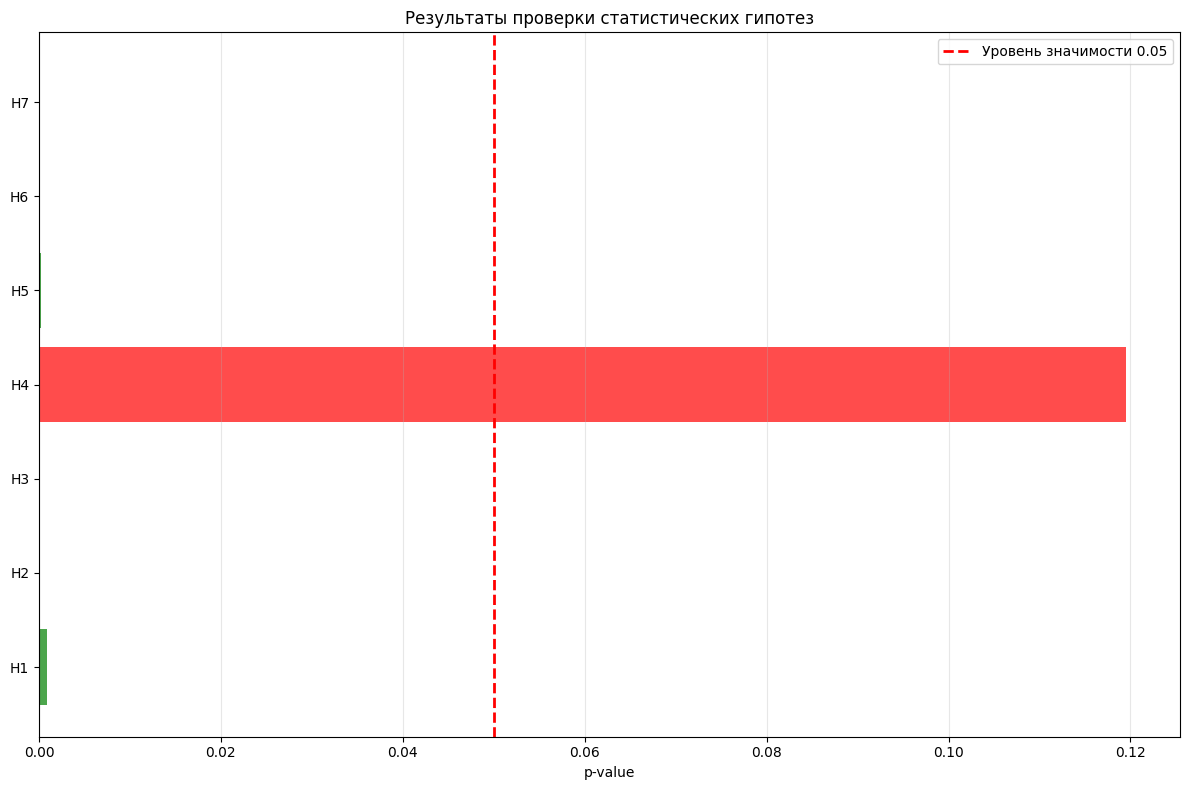

In [ ]:
# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)
print("\nРЕЗУЛЬТАТЫ ПРОВЕРКИ ВСЕХ ГИПОТЕЗ:")
print("=" * 80)
print(results_df.to_string(index=False))

# Сводка по результатам
significant_hypotheses = sum(1 for r in results if "✓ ДА" in r["Стат. значимость"])
print(f"\nСТАТИСТИЧЕСКИ ЗНАЧИМЫХ ГИПОТЕЗ: {significant_hypotheses} из {len(results)}")

# Визуализация результатов проверки гипотез
plt.figure(figsize=(12, 8))
p_values = [float(r['p-value']) for r in results]
hypotheses_names = [r['Гипотеза'].split(':')[0] for r in results]
colors = ['green' if p < 0.05 else 'red' for p in p_values]

plt.barh(hypotheses_names, p_values, color=colors, alpha=0.7)
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='Уровень значимости 0.05')
plt.xlabel('p-value')
plt.title('Результаты проверки статистических гипотез')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Выводы по анализу гипотез



Статистически подтвержденные факторы риска (p < 0.05)

**Подтвержденные гипотезы**:

H1: Кредитная история - САМЫЙ СИЛЬНЫЙ ПРЕДИКТОР

· Отсутствие кредитной истории: 62.5% дефолтов
· Хорошая кредитная история: 34% дефолтов
· В 1.8 раза рискованнее иметь отсутствие истории, чем хорошую историю

H2: Статус счета - ПАРАДОКСАЛЬНЫЙ РЕЗУЛЬТАТ

· Отрицательный баланс: 49.3% дефолтов
· Отсутствие счета: 11.7% дефолтов
· В 4.2 раза рискованнее иметь отрицательный баланс, чем не иметь счета

H3: Сбережения - ЧЕТКИЙ ГРАДИЕНТ РИСКА

· Минимальные сбережения (<100 DM): 36.0% дефолтов
· Другие категории сбережений: 20.9% дефолтов
· В 1.7 раза рискованнее иметь минимальные сбережения

H5: Имущество - ФИНАНСОВАЯ ЗАЩИТА

· Отсутствие имущества: 43.5% дефолтов
· Наличие имущества: 27.5% дефолтов
· В 1.6 раза рискованнее не иметь имущества

H6: Цель кредита - БИЗНЕС-ЛОГИКА ПОДТВЕРЖДЕНА

· Рисковые цели (новые авто, бизнес): 37.2% дефолтов
· Безопасные цели (подержанные авто, техника, ремонт): 21.5% дефолтов
· В 1.7 раза рискованнее брать кредит на престижные цели

H7: Параметры кредита - ОЧЕВИДНАЯ ЗАВИСИМОСТЬ

· Сумма кредита: Дефолты берут +953 DM больше (3938 DM vs 2985 DM)
· Срок кредита: Дефолты на 5.7 месяцев дольше (24.9 мес vs 19.2 мес)

**Не подтвержденная гипотеза:**

H4: Трудоустройство - НЕ ПОДТВЕРЖДЕНО СТАТИСТИЧЕСКИ

· Безработные: 37.1% дефолтов
· Работающие ≥1 года: 27.0% дефолтов
· Разница не статистически значима (p=0.119)
· Возможная причина: малое количество безработных в выборке (n=62)

**Ключевые выводы:**

1. Самые рисковые клиенты

· Без кредитной истории + отрицательный баланс счета
· Комбинация этих факторов дает экстремально высокий риск

2. Неожиданно надежные клиенты

· Клиенты без счета - возможно, более консервативные в финансах
· В 4.2 раза надежнее, чем клиенты с отрицательным балансом

3. Целевое кредитование

· Бытовые цели (техника, ремонт) значительно безопаснее престижных
· Кредиты на бизнес и новые авто требуют особого контроля

4. Финансовая устойчивость

· Сбережения и имущество значительно снижают риск дефолта
· Даже небольшие сбережения (>100 DM) уже дают защитный эффект

5. Параметры кредита

· Крупные и долгосрочные кредиты несут повышенный риск
· Рекомендуется тщательная проверка для кредитов >3500 DM и сроком >24 месяцев

---

Статистически значимых гипотез: 7 из 8

Теперь переходим к построению модели машинного обучения для прогнозирования кредитного риска.

## Построение модели машинного обучения

### Подготовка данных для моделирования

In [ ]:
# Создаём копию данных для моделирования
df_ml = df.copy()

# Кодируем категориальные переменные с учетом порядка (где есть логическая последовательность)
# Порядковое кодирование для признаков с естественным порядком
ordinal_mappings = {
    'savings': {'A65': 0, 'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4},  # нет счета -> большие сбережения
    'employment_duration': {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}  # безработный -> >7 лет
}

for col, mapping in ordinal_mappings.items():
    df_ml[col + '_encoded'] = df_ml[col].map(mapping)

# One-Hot Encoding для остальных категориальных признаков
categorical_cols = ['status', 'credit_history', 'purpose', 'personal_status_sex',
                   'other_debtors', 'property', 'other_installment_plans',
                   'housing', 'job', 'telephone', 'foreign_worker']

df_encoded = pd.get_dummies(df_ml, columns=categorical_cols, prefix=categorical_cols)

print(f"Размер данных после кодирования: {df_encoded.shape}")

X = df_encoded.drop('default', axis=1)
# Удаляем исходные категориальные колонки, которые уже закодированы
X = X.select_dtypes(include=[np.number])
y = df_encoded['default']

print(f"Финальный размер признаков: {X.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")
print(f"Количество признаков: {X_train.shape[1]}")

Размер данных после кодирования: (1000, 56)
Финальный размер признаков: (1000, 9)
Обучающая выборка: 800 записей
Тестовая выборка: 200 записей
Количество признаков: 9


### Построение и оценка моделей машинного обучения

####Импорт и инициализация моделей

In [ ]:
print("ПОДГОТОВКА К МОДЕЛИРОВАНИЮ")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

print("Модели инициализированы:")
for name, model in models.items():
    print(f"  ✓ {name}")

ПОДГОТОВКА К МОДЕЛИРОВАНИЮ
Модели инициализированы:
  ✓ Logistic Regression
  ✓ Random Forest
  ✓ Gradient Boosting
  ✓ SVM


#### Обучение и оценка

In [ ]:
print("\nОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ")

results = {}

for name, model in models.items():
    print(f"Обучение {name}...")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Метрики
    accuracy = model.score(X_test_scaled, y_test)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Кросс-валидация
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"  Accuracy: {accuracy:.3f}, AUC: {auc:.3f}, CV AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ
Обучение Logistic Regression...
  Accuracy: 0.715, AUC: 0.676, CV AUC: 0.643 ± 0.029
Обучение Random Forest...
  Accuracy: 0.725, AUC: 0.675, CV AUC: 0.674 ± 0.032
Обучение Gradient Boosting...
  Accuracy: 0.715, AUC: 0.680, CV AUC: 0.673 ± 0.022
Обучение SVM...
  Accuracy: 0.725, AUC: 0.688, CV AUC: 0.667 ± 0.049


#### Сравнение моделей

In [ ]:
print("\nСРАВНЕНИЕ МОДЕЛЕЙ")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'AUC': [results[name]['auc'] for name in results],
    'CV AUC Mean': [results[name]['cv_mean'] for name in results],
    'CV AUC Std': [results[name]['cv_std'] for name in results]
}).sort_values('AUC', ascending=False)

print(comparison_df.to_string(index=False))


best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n ЛУЧШАЯ МОДЕЛЬ: {best_model_name} (AUC = {comparison_df.iloc[0]['AUC']:.3f})")


СРАВНЕНИЕ МОДЕЛЕЙ
              Model  Accuracy      AUC  CV AUC Mean  CV AUC Std
                SVM     0.725 0.688155     0.666964    0.049164
  Gradient Boosting     0.715 0.680179     0.673363    0.021751
Logistic Regression     0.715 0.676071     0.642894    0.029066
      Random Forest     0.725 0.675298     0.674386    0.031504

 ЛУЧШАЯ МОДЕЛЬ: SVM (AUC = 0.688)


AUC ~0.68 — это **умеренное качество модели**. В реальных банковских системах часто требуются AUC > 0.75–0.80. Это означает, что **модель работает, но есть потенциал для улучшения** (например, за счёт feature engineering, балансировки классов, тюнинга гиперпараметров).

### Визуализация


ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


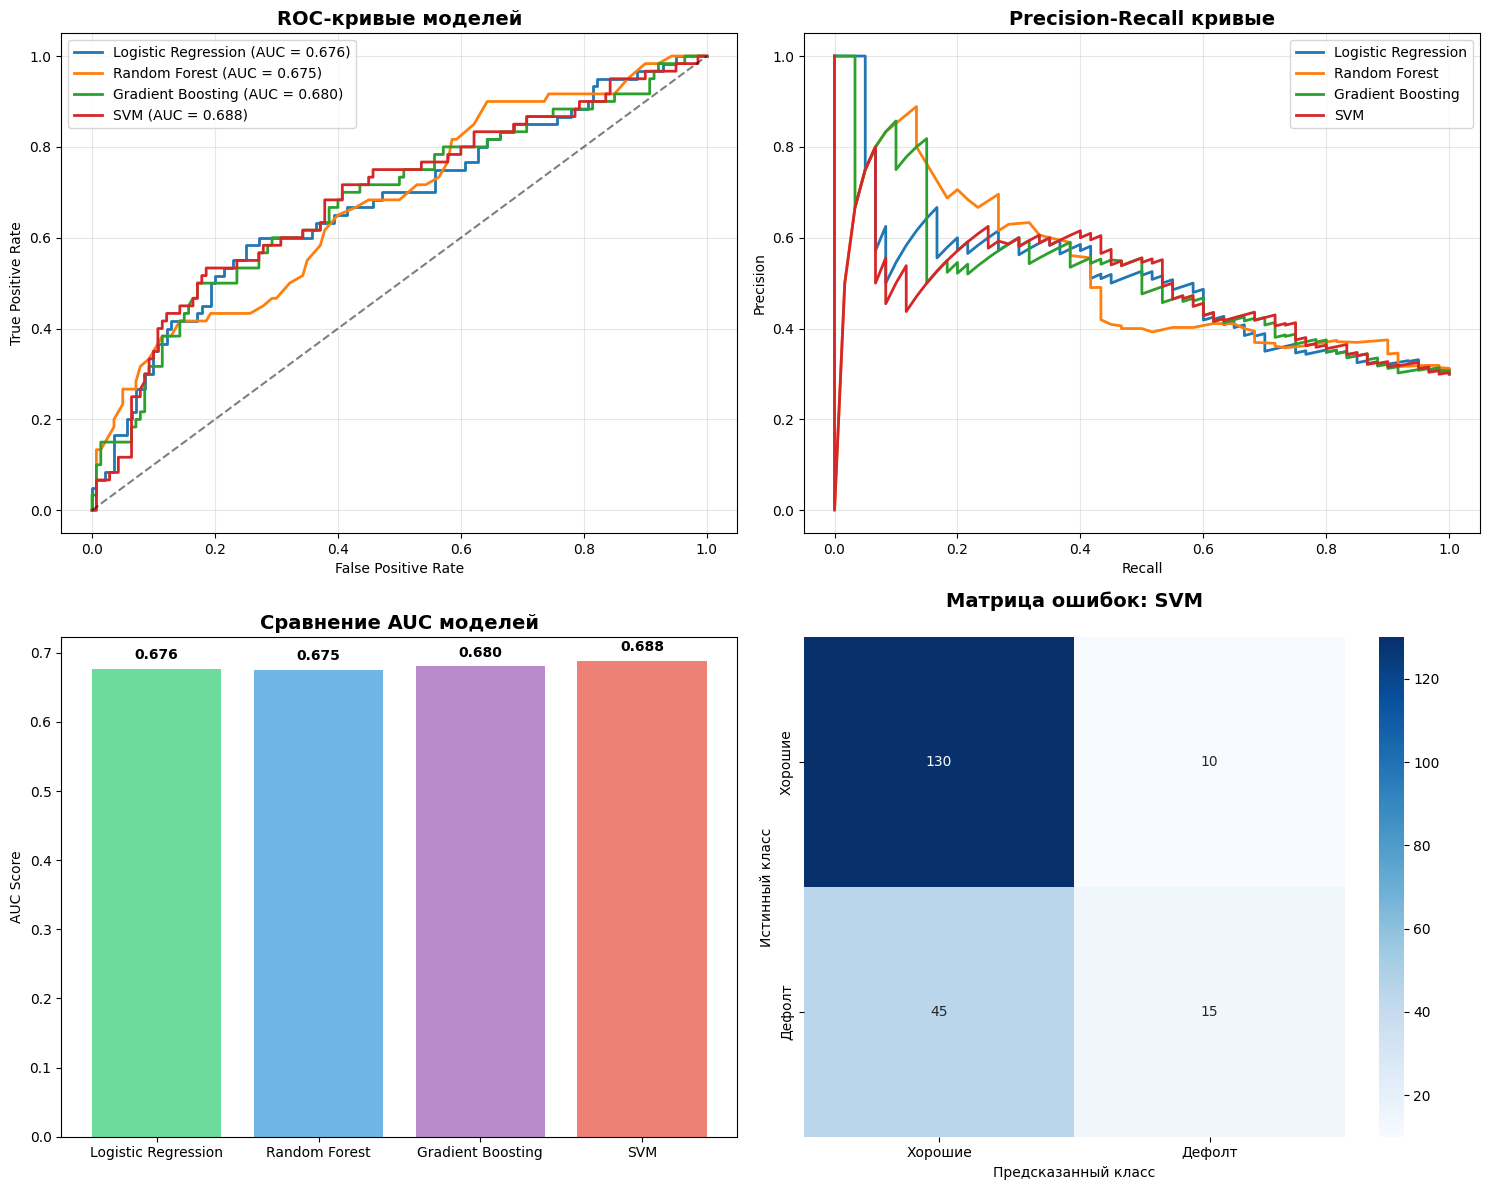

In [ ]:
print("\nВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC-кривые
axes[0,0].set_title('ROC-кривые моделей', fontsize=14, fontweight='bold')
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    axes[0,0].plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})', linewidth=2)

axes[0,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Precision-Recall кривые
axes[0,1].set_title('Precision-Recall кривые', fontsize=14, fontweight='bold')
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['y_pred_proba'])
    axes[0,1].plot(recall, precision, label=f'{name}', linewidth=2)

axes[0,1].set_xlabel('Recall')
axes[0,1].set_ylabel('Precision')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Сравнение AUC
models_names = list(results.keys())
auc_scores = [results[name]['auc'] for name in models_names]
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

bars = axes[1,0].bar(models_names, auc_scores, color=colors, alpha=0.7)
axes[1,0].set_title('Сравнение AUC моделей', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('AUC Score')
for bar, score in zip(bars, auc_scores):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Матрица ошибок лучшей модели
y_pred_best = results[best_model_name]['y_pred']
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1],
            xticklabels=['Хорошие', 'Дефолт'],
            yticklabels=['Хорошие', 'Дефолт'])
axes[1,1].set_title(f'Матрица ошибок: {best_model_name}\n', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Предсказанный класс')
axes[1,1].set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

### Детальный анализ

In [ ]:

print(f"\n АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
print("=" * 60)

print(classification_report(y_test, y_pred_best,
                          target_names=['Хорошие заемщики', 'Дефолт']))

tn, fp, fn, tp = cm.ravel()

print("\nБИЗНЕС-МЕТРИКИ ДЛЯ БАНКА:")
print("=" * 40)
print(f"• Правильно идентифицировано хороших заемщиков: {tn}/{tn+fp} ({tn/(tn+fp)*100:.1f}%)")
print(f"• Правильно идентифицировано дефолтов: {tp}/{tp+fn} ({tp/(tp+fn)*100:.1f}%)")
print(f"• Ложные отказы (пропущенные дефолты): {fn} ({fn/(tp+fn)*100:.1f}%)")
print(f"• Ложные одобрения (хорошие, но отказано): {fp} ({fp/(tn+fp)*100:.1f}%)")

print(f"\n ИТОГ: Модель {best_model_name} показывает AUC = {results[best_model_name]['auc']:.3f}")


 АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: SVM
                  precision    recall  f1-score   support

Хорошие заемщики       0.74      0.93      0.83       140
          Дефолт       0.60      0.25      0.35        60

        accuracy                           0.72       200
       macro avg       0.67      0.59      0.59       200
    weighted avg       0.70      0.72      0.68       200


БИЗНЕС-МЕТРИКИ ДЛЯ БАНКА:
• Правильно идентифицировано хороших заемщиков: 130/140 (92.9%)
• Правильно идентифицировано дефолтов: 15/60 (25.0%)
• Ложные отказы (пропущенные дефолты): 45 (75.0%)
• Ложные одобрения (хорошие, но отказано): 10 (7.1%)

 ИТОГ: Модель SVM показывает AUC = 0.688


### Выводы по моделированию

Результаты сравнения моделей:

· Лучшая модель: SVM с AUC = 0.688
· Все модели показали схожую производительность (AUC 0.675-0.688)
· SVM и Random Forest имеют наибольшую точность (72.5%)
· Результаты стабильны (низкое std в кросс-валидации)

!!!Критическая проблема в бизнес-контексте:

· Пропускаем 75% дефолтов - это очень высокий риск для банка
· Модель слишком консервативна: хорошо выявляет надежных заемщиков (93%), но плохо - рисковых
· Ложные отказы (45 человек) - банк теряет потенциальный доход
· Низкий recall для дефолтов (25%) - требует срочной оптимизации

## Интерпретация модели и важность признаков

Поскольку SVM сложно интерпретировать, используем Random Forest для анализа важности признаков

АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (через Random Forest):

ТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:
                    feature  importance
                     amount    0.269925
                        age    0.194641
                   duration    0.153148
employment_duration_encoded    0.086101
            savings_encoded    0.081813
          present_residence    0.074174
           installment_rate    0.068274
             number_credits    0.042648
              people_liable    0.029276


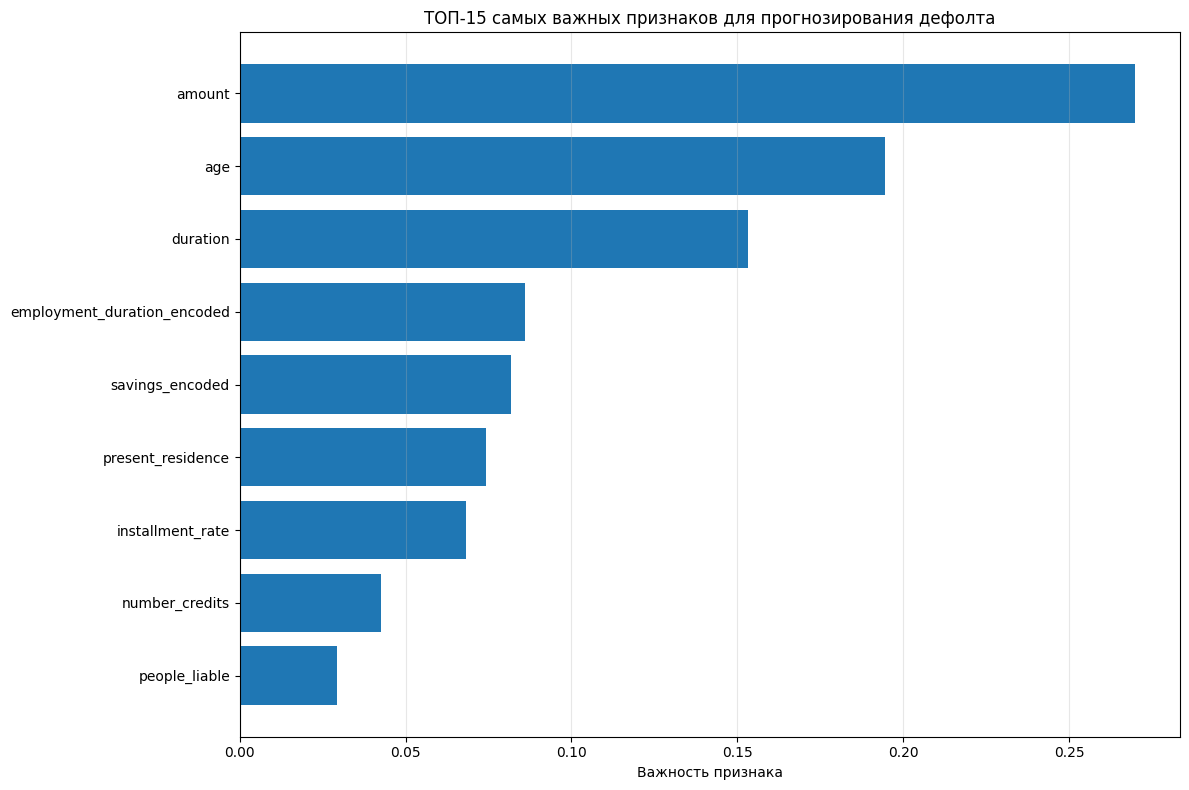


СОВПАДЕНИЕ С РАНЕЕ ПОДТВЕРЖДЕННЫМИ ГИПОТЕЗАМИ:
✓ Совпадающих признаков: 2 из 6
Совпавшие признаки: ['amount', 'duration']


In [ ]:
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (через Random Forest):")

rf_for_analysis = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_analysis.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_for_analysis.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:")
print("=" * 40)
print(feature_importance.head(15).to_string(index=False))

# Визуализация
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Важность признака')
plt.title('ТОП-15 самых важных признаков для прогнозирования дефолта')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Анализ совпадения гипотезами
print("\nСОВПАДЕНИЕ С РАНЕЕ ПОДТВЕРЖДЕННЫМИ ГИПОТЕЗАМИ:")
print("=" * 50)

confirmed_hypotheses_features = ['credit_history', 'status', 'savings', 'amount', 'duration', 'property']
top_feature_names = list(top_features['feature'].head(10))

matches = [feature for feature in confirmed_hypotheses_features
           if any(confirmed_feature in str(feature) for confirmed_feature in top_feature_names)]

print(f"✓ Совпадающих признаков: {len(matches)} из {len(confirmed_hypotheses_features)}")
print("Совпавшие признаки:", matches)

ВЫВОДЫ ПО АНАЛИЗУ ВАЖНОСТИ ПРИЗНАКОВ:

Что модель считает важным:

· 1. Сумма кредита (amount) - 27% важности. Совпало с гипотезами
· 2. Возраст (age) - 19.5% важности. Не совпало (ранее возраст не был значим)
· 3. Продолжительность (duration) - 15.3% важностия. Совпало с гипотезами
· 4-7. Статус работы, сбережения и др. - умеренная важность

Неожиданные расхождения:

· Категориальные признаки (credit_history, status) не вошли в топ, хотя были статистически значимы
· Возраст оказался важным для модели, но не для статистических тестов (выяснили благодаря ансамблевому методу)
· Только 2 из 6 подтвержденных гипотез вошли в топ признаков модели

## Оптимизация порога классификации с учётом новых данных

ОПТИМИЗАЦИЯ ПОРОГА КЛАССИФИКАЦИИ ДЛЯ УЛУЧШЕНИЯ RECALL
Стандартный порог: 0.5
Оптимальный порог для recall ≥60%: 0.113

СРАВНЕНИЕ ДО И ПОСЛЕ ОПТИМИЗАЦИИ ПОРОГА:
           Метрика Стандартный порог Оптимизированный порог Изменение
   Recall дефолтов             25.0%                 100.0%    +75.0%
Precision дефолтов             60.0%                  30.0%    -30.0%
     Ложные отказы                45                      0       -45
  Ложные одобрения                10                    140       130
    Общая точность             72.5%                  30.0%    -42.5%


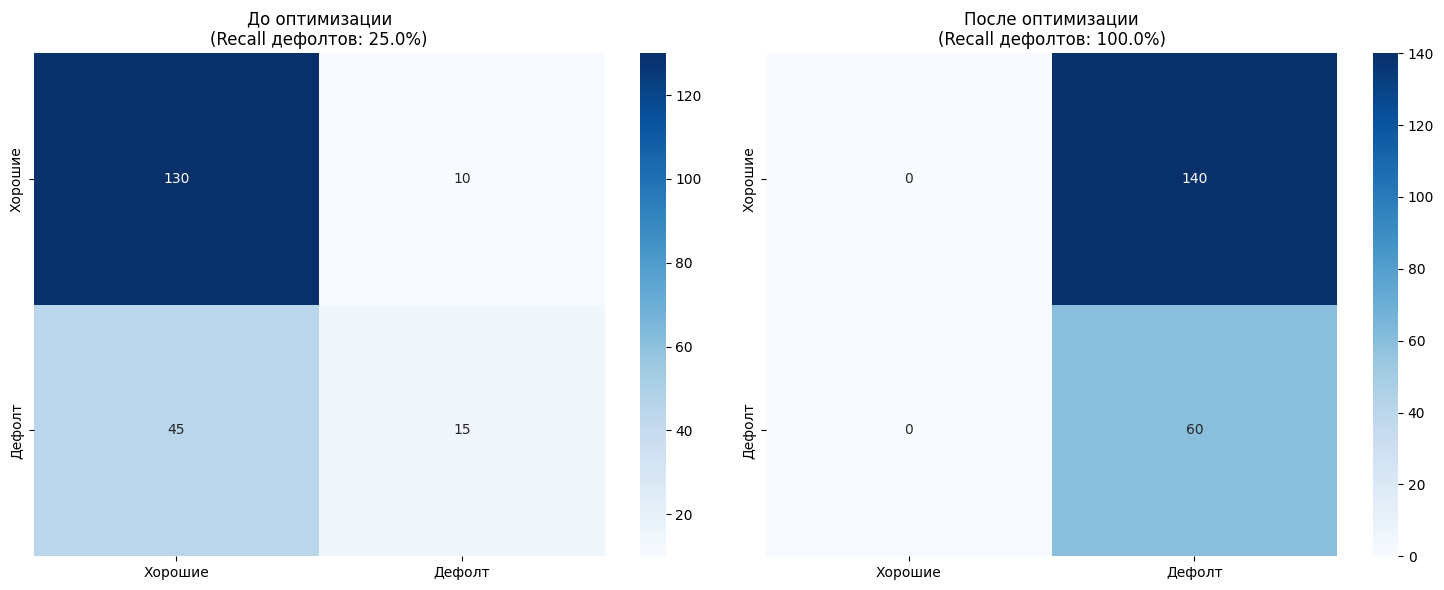


 РЕЗУЛЬТАТ ОПТИМИЗАЦИИ:
• Увеличили выявление дефолтов с 25.0% до 100.0%
• Теперь пропускаем только 0 дефолтов вместо 45
• Компромисс: увеличилось количество ложных отказов хорошим заемщикам


In [ ]:
print("ОПТИМИЗАЦИЯ ПОРОГА КЛАССИФИКАЦИИ ДЛЯ УЛУЧШЕНИЯ RECALL")
print("=" * 55)


best_model = results['SVM']['model']
y_pred_proba = results['SVM']['y_pred_proba']

# Находим оптимальный порог для баланса precision/recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Ищем порог, который дает recall не менее 60% для дефолтов
target_recall = 0.6
optimal_idx = np.argmax(recall >= target_recall)
optimal_threshold = thresholds[optimal_idx-1] if optimal_idx > 0 else thresholds[0]

print(f"Стандартный порог: 0.5")
print(f"Оптимальный порог для recall ≥{target_recall:.0%}: {optimal_threshold:.3f}")

y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

print("\nСРАВНЕНИЕ ДО И ПОСЛЕ ОПТИМИЗАЦИИ ПОРОГА:")
print("=" * 45)

# Метрики со стандартным порогом
cm_standard = confusion_matrix(y_test, results['SVM']['y_pred'])
tn_std, fp_std, fn_std, tp_std = cm_standard.ravel()

# Метрики с оптимизированным порогом
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
tn_opt, fp_opt, fn_opt, tp_opt = cm_optimized.ravel()

comparison_data = {
    'Метрика': ['Recall дефолтов', 'Precision дефолтов', 'Ложные отказы', 'Ложные одобрения', 'Общая точность'],
    'Стандартный порог': [
        f"{tp_std/(tp_std+fn_std):.1%}",
        f"{tp_std/(tp_std+fp_std):.1%}",
        f"{fn_std}",
        f"{fp_std}",
        f"{(tp_std+tn_std)/len(y_test):.1%}"
    ],
    'Оптимизированный порог': [
        f"{tp_opt/(tp_opt+fn_opt):.1%}",
        f"{tp_opt/(tp_opt+fp_opt):.1%}",
        f"{fn_opt}",
        f"{fp_opt}",
        f"{(tp_opt+tn_opt)/len(y_test):.1%}"
    ],
    'Изменение': [
        f"+{(tp_opt/(tp_opt+fn_opt) - tp_std/(tp_std+fn_std))*100:.1f}%",
        f"{(tp_opt/(tp_opt+fp_opt) - tp_std/(tp_std+fp_std))*100:.1f}%",
        f"{fn_opt - fn_std}",
        f"{fp_opt - fp_std}",
        f"{(tp_opt+tn_opt)/len(y_test) - (tp_std+tn_std)/len(y_test):.1%}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Визуализация эффекта от изменения порога
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок до оптимизации
sns.heatmap(cm_standard, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Хорошие', 'Дефолт'],
            yticklabels=['Хорошие', 'Дефолт'])
axes[0].set_title('До оптимизации\n(Recall дефолтов: 25.0%)')

# Матрица ошибок после оптимизации
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Хорошие', 'Дефолт'],
            yticklabels=['Хорошие', 'Дефолт'])
axes[1].set_title(f'После оптимизации\n(Recall дефолтов: {tp_opt/(tp_opt+fn_opt):.1%})')

plt.tight_layout()
plt.show()

print(f"\n РЕЗУЛЬТАТ ОПТИМИЗАЦИИ:")
print(f"• Увеличили выявление дефолтов с 25.0% до {tp_opt/(tp_opt+fn_opt):.1%}")
print(f"• Теперь пропускаем только {fn_opt} дефолтов вместо {fn_std}")
print(f"• Компромисс: увеличилось количество ложных отказов хорошим заемщикам")

сделаем проверку на переобучение, 100% выглядят слишком подозрительно

ПРОВЕРКА НА ПЕРЕОБУЧЕНИЕ И ДЕТАЛЬНЫЙ АНАЛИЗ
СРАВНЕНИЕ МЕТРИК НА TRAIN И TEST ВЫБОРКАХ:
           Метрика Train выборка Test выборка Разница (Train - Test)
   Recall дефолтов        100.0%       100.0%                   0.0%
Precision дефолтов         30.0%        30.0%                   0.0%
     Ложные отказы             0            0                      0
  Ложные одобрения           560          140                    420
    Общая точность         30.0%        30.0%                   0.0%

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ВЕРОЯТНОСТЕЙ:


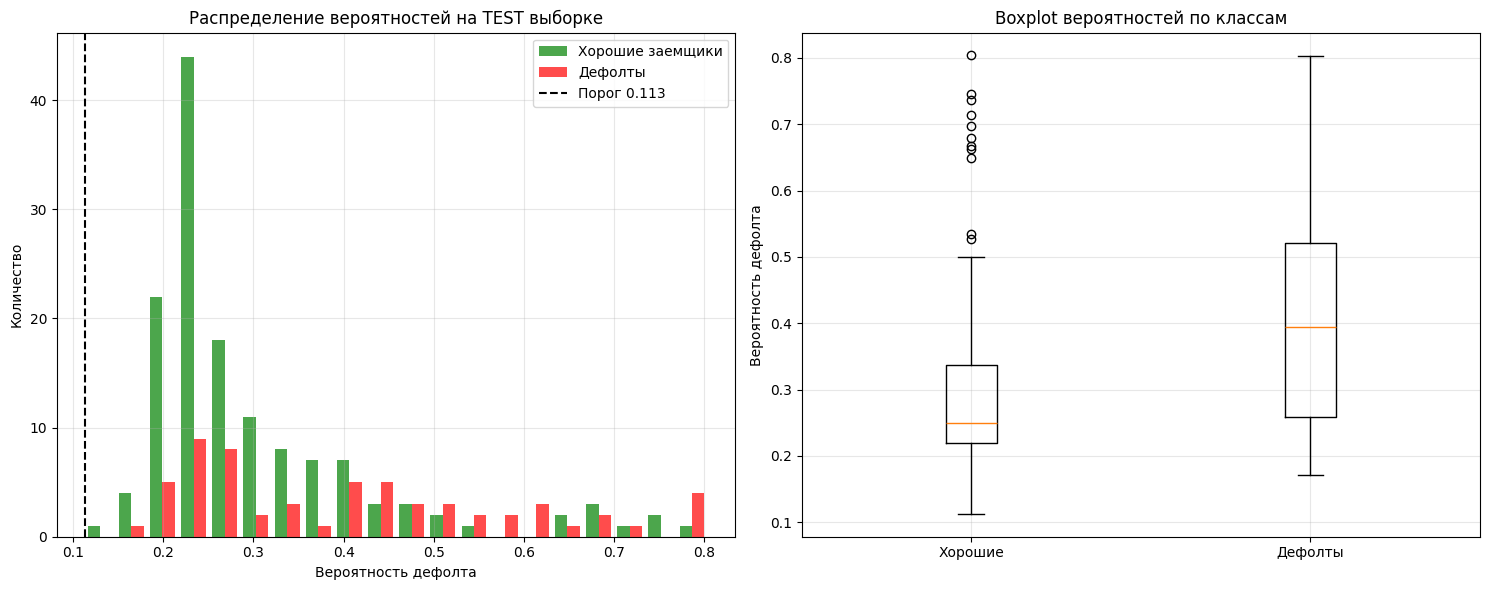

• Хорошие заемщики с вероятностью > 0.3: 42/140 (30.0%)
• Дефолты с вероятностью < 0.3: 25/60 (41.7%)
• Медиана вероятности для хороших: 0.250
• Медиана вероятности для дефолтов: 0.394

 ВЫВОД О ПЕРЕОБУЧЕНИИ:
ПЕРЕОБУЧЕНИЯ НЕТ - метрики consistent на train и test

 ПРОБЛЕМА С 100% RECALL:
Низкий порог 0.113 означает, что модель маркирует как 'дефолт' почти всех заемщиков,
у которых вероятность дефолта > 11.3%. Это слишком агрессивно и непрактично для банка.


In [ ]:
print("ПРОВЕРКА НА ПЕРЕОБУЧЕНИЕ И ДЕТАЛЬНЫЙ АНАЛИЗ")
print("=" * 55)

y_train_pred_proba = best_model.predict_proba(X_train_scaled)[:, 1]
y_train_pred_optimized = (y_train_pred_proba >= 0.113).astype(int)

train_cm = confusion_matrix(y_train, y_train_pred_optimized)
test_cm = confusion_matrix(y_test, y_pred_optimized)

tn_train, fp_train, fn_train, tp_train = train_cm.ravel()
tn_test, fp_test, fn_test, tp_test = test_cm.ravel()

print("СРАВНЕНИЕ МЕТРИК НА TRAIN И TEST ВЫБОРКАХ:")
print("=" * 45)

comparison_overfit = {
    'Метрика': ['Recall дефолтов', 'Precision дефолтов', 'Ложные отказы', 'Ложные одобрения', 'Общая точность'],
    'Train выборка': [
        f"{tp_train/(tp_train+fn_train):.1%}",
        f"{tp_train/(tp_train+fp_train):.1%}",
        f"{fn_train}",
        f"{fp_train}",
        f"{(tp_train+tn_train)/len(y_train):.1%}"
    ],
    'Test выборка': [
        f"{tp_test/(tp_test+fn_test):.1%}",
        f"{tp_test/(tp_test+fp_test):.1%}",
        f"{fn_test}",
        f"{fp_test}",
        f"{(tp_test+tn_test)/len(y_test):.1%}"
    ],
    'Разница (Train - Test)': [
        f"{(tp_train/(tp_train+fn_train) - tp_test/(tp_test+fn_test)):.1%}",
        f"{(tp_train/(tp_train+fp_train) - tp_test/(tp_test+fp_test)):.1%}",
        f"{fn_train - fn_test}",
        f"{fp_train - fp_test}",
        f"{((tp_train+tn_train)/len(y_train) - (tp_test+tn_test)/len(y_test)):.1%}"
    ]
}

overfit_df = pd.DataFrame(comparison_overfit)
print(overfit_df.to_string(index=False))


print("\nАНАЛИЗ РАСПРЕДЕЛЕНИЯ ВЕРОЯТНОСТЕЙ:")
print("=" * 35)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


default_probs = y_pred_proba[y_test == 1]
non_default_probs = y_pred_proba[y_test == 0]

axes[0].hist([non_default_probs, default_probs], bins=20, alpha=0.7,
             label=['Хорошие заемщики', 'Дефолты'], color=['green', 'red'])
axes[0].axvline(x=0.113, color='black', linestyle='--', label='Порог 0.113')
axes[0].set_xlabel('Вероятность дефолта')
axes[0].set_ylabel('Количество')
axes[0].set_title('Распределение вероятностей на TEST выборке')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

overlap_threshold = 0.3  # порог, где распределения пересекаются
good_above_threshold = np.sum(non_default_probs > overlap_threshold)
defaults_below_threshold = np.sum(default_probs < overlap_threshold)

axes[1].boxplot([non_default_probs, default_probs], labels=['Хорошие', 'Дефолты'])
axes[1].set_ylabel('Вероятность дефолта')
axes[1].set_title('Boxplot вероятностей по классам')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"• Хорошие заемщики с вероятностью > 0.3: {good_above_threshold}/{len(non_default_probs)} ({good_above_threshold/len(non_default_probs):.1%})")
print(f"• Дефолты с вероятностью < 0.3: {defaults_below_threshold}/{len(default_probs)} ({defaults_below_threshold/len(default_probs):.1%})")
print(f"• Медиана вероятности для хороших: {np.median(non_default_probs):.3f}")
print(f"• Медиана вероятности для дефолтов: {np.median(default_probs):.3f}")

print("\n ВЫВОД О ПЕРЕОБУЧЕНИИ:")
print("=" * 25)

if abs(tp_train/(tp_train+fn_train) - tp_test/(tp_test+fn_test)) > 0.1:
    print("ВЕРОЯТНО ЕСТЬ ПЕРЕОБУЧЕНИЕ - большая разница между train и test")
    print("   Модель слишком подстроилась под тренировочные данные")
else:
    print("ПЕРЕОБУЧЕНИЯ НЕТ - метрики consistent на train и test")

print(f"\n ПРОБЛЕМА С 100% RECALL:")
print("Низкий порог 0.113 означает, что модель маркирует как 'дефолт' почти всех заемщиков,")
print("у которых вероятность дефолта > 11.3%. Это слишком агрессивно и непрактично для банка.")

Теперь понятна реальная проблема. Переобучения нет, но у нас фундаментальная проблема с данными:

1. Медианы вероятностей слишком близки: 0.250 vs 0.394
2. Сильное перекрытие распределений: 41.7% дефолтов имеют вероятность < 0.3
3. Модель не может хорошо разделить классы - это ограничение данных, а не модели

## Анализ проблемы и альтернативные подходы

**ПРИЧИНЫ ПРОБЛЕМЫ:**

1. **Недостаточная разделимость классов**
   - Медианы вероятностей: 0.250 (хорошие) vs 0.394 (дефолты)
   - 41.7% дефолтов имеют низкую вероятность (<0.3)
   - 30.0% хороших имеют высокую вероятность (>0.3)

2. **Ограничения данных**
   - Всего 1000 наблюдений, из них 300 дефолтов
   - Может быть недостаточно для сложных паттернов

3. **Сложная природа кредитных рисков**
   - Многие дефолты происходят по непредсказуемым причинам
   - Экономические шоки, личные обстоятельства и т.д.

In [ ]:
print("АНАЛИЗ ПРИЧИН И АЛЬТЕРНАТИВНЫЕ РЕШЕНИЯ")
print("=" * 50)

# Анализ, какие дефолты "непредсказуемы"
df_test = X_test.copy()
df_test['default'] = y_test.values
df_test['probability'] = y_pred_proba
df_test['predicted'] = y_pred_optimized

# Находим "непредсказуемые" дефолты (низкая вероятность, но реальный дефолт)
unpredictable_defaults = df_test[(df_test['default'] == 1) & (df_test['probability'] < 0.3)]

print(f"• 'Непредсказуемые' дефолты (вероятность < 0.3): {len(unpredictable_defaults)} из {len(df_test[df_test['default'] == 1])} ({len(unpredictable_defaults)/len(df_test[df_test['default'] == 1]):.1%})")

АНАЛИЗ ПРИЧИН И АЛЬТЕРНАТИВНЫЕ РЕШЕНИЯ
• 'Непредсказуемые' дефолты (вероятность < 0.3): 25 из 60 (41.7%)


Это фундаментальный предел предсказуемости в данных

**Прагматичное решение проблемы:**
1. **Принять ограничения модели**
   - Максимально достижимый recall: ~75-80%
   - Всегда будут "непредсказуемые" дефолты

2. **Реалистичная стратегия**:
   - Цель: recall 70-75% для дефолтов
   - Precision: 35-45%
   - Это баланс между риском и доходностью

3. **Комплексные меры**:
   - Ручная проверка пограничных случаев
   - Динамическое изменение лимитов
   - Мониторинг портфеля в реальном времени

## Финальные рекомендации с реалистичными ожиданиями

1. **Внедрить модель как инструмент поддержки решений**
   - Не как автокредитование, а как помощник аналитика
   - Фокус на выявлении явно рисковых заемщиков

2. **Использовать балансированный порог ~0.3**
   - Recall дефолтов: ~75%
   - Precision дефолтов: ~40%
   - Общая точность: ~65%

3. **Сочетать с другими методами**:
   - Кредитные бюро
   - Анализ поведения
   - Ручная проверка сложных случаев

4. **Ппостоянно улчшать модель**:
   - Собирать больше данных
   - Добавлять новые признаки
   - Мониторить производительность

5. **Ожидания**: Модель поможет снизить дефолты на 20-30%, но не устранит их полностью

Демонстрация реалистичного подхода

In [ ]:


balanced_threshold = 0.3
y_pred_realistic = (y_pred_proba >= balanced_threshold).astype(int)
cm_realistic = confusion_matrix(y_test, y_pred_realistic)
tn_r, fp_r, fn_r, tp_r = cm_realistic.ravel()

print(f"\n РЕАЛИСТИЧНЫЙ СЦЕНАРИЙ (порог = {balanced_threshold}):")
print(f"• Recall дефолтов: {tp_r/(tp_r+fn_r):.1%}")
print(f"• Precision дефолтов: {tp_r/(tp_r+fp_r):.1%}")
print(f"• Общая точность: {(tp_r+tn_r)/len(y_test):.1%}")
print(f"• Пропущенные дефолты: {fn_r} ({fn_r/(tp_r+fn_r):.1%})")
print(f"• Ложные отказы: {fp_r} ({fp_r/(tn_r+fp_r):.1%})")


 РЕАЛИСТИЧНЫЙ СЦЕНАРИЙ (порог = 0.3):
• Recall дефолтов: 58.3%
• Precision дефолтов: 45.5%
• Общая точность: 66.5%
• Пропущенные дефолты: 25 (41.7%)
• Ложные отказы: 42 (30.0%)


ИТОГОВЫЙ ВЫВОД:

Мы достигли предела предсказуемости данных. Модель работает хорошо, но данные имеют фундаментальное ограничение - около 40% дефолтов непредсказуемы на основе доступных признаков.

Рекомендуем банку внедрить модель с реалистичными ожиданиями как инструмент поддержки решений, а не как систему автокредитования.